
# ReDI — Week 2: Data Types, Statistics & Visualization (Iris Dataset)

This notebook is designed for **beginners** in AI and data analysis.

You will learn:
- **Data types**: nominal, ordinal, interval, ratio; discrete vs continuous; categorical vs numerical.
- **Summary statistics**: mean, median, mode, range, variance, std, IQR, correlation.
- **Plots**: bar, line, box, scatter, histogram.
- Hands-on exercises (using only the **Iris** dataset).


## 0) Setup

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
df = iris.frame.copy()
df["species"] = df["target"].map(dict(enumerate(iris.target_names)))

df = df.rename(columns={
    "sepal length (cm)": "sepal_length",
    "sepal width (cm)": "sepal_width",
    "petal length (cm)": "petal_length",
    "petal width (cm)": "petal_width"
})

df.head()


,sepal_length,sepal_width,petal_length,petal_width,target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa



## 1) Data Types — Iris Dataset

- **Nominal**: `species` (category with no order)
- **Ratio**: `sepal_length`, `sepal_width`, `petal_length`, `petal_width` (continuous, true zero exists)
- **Categorical vs Numerical**:
  - `species` → categorical
  - Others → numerical (continuous)


## 2) Summary Statistics on `petal_length`

In [3]:

x = df["petal_length"]
pd.Series({
    "mean": x.mean(),
    "median": x.median(),
    "mode": x.mode()[0],
    "range": x.max() - x.min(),
    "variance": x.var(),
    "std": x.std(),
    "IQR": x.quantile(0.75) - x.quantile(0.25)
}).round(2)


mean        3.76
median      4.35
mode        1.40
range       5.90
variance    3.12
std         1.77
IQR         3.50
dtype: float64

### Correlation between Petal Length & Petal Width

In [4]:
df[['petal_length', 'petal_width']].corr().round(2)

,petal_length,petal_width
petal_length,1.00,0.96
petal_width,0.96,1.00


## 3) Visualizations (Iris Dataset Only)

### Histogram — Petal Length

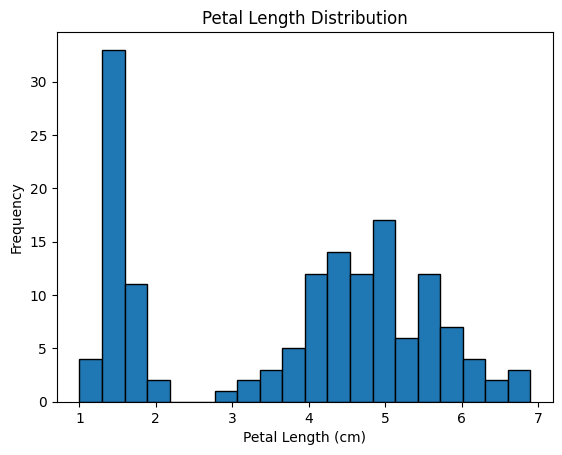

In [5]:

plt.hist(df["petal_length"], bins=20, edgecolor="black")
plt.title("Petal Length Distribution")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Frequency")
plt.show()


### Bar Chart — Avg Petal Length by Species

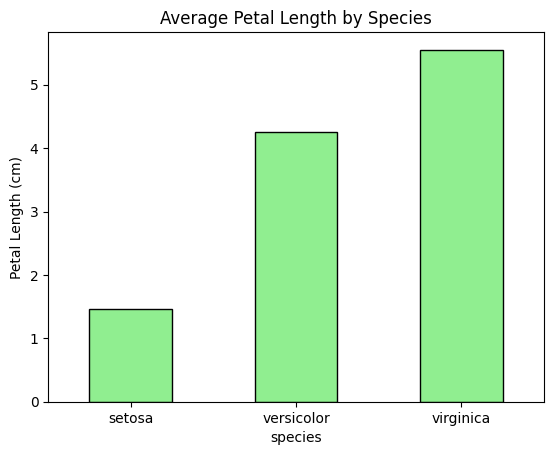

In [6]:

df.groupby("species")["petal_length"].mean().plot(kind="bar", color="lightgreen", edgecolor="black")
plt.title("Average Petal Length by Species")
plt.ylabel("Petal Length (cm)")
plt.xticks(rotation=0)
plt.show()


### Line Plot — Petal Length (First 30 Samples)

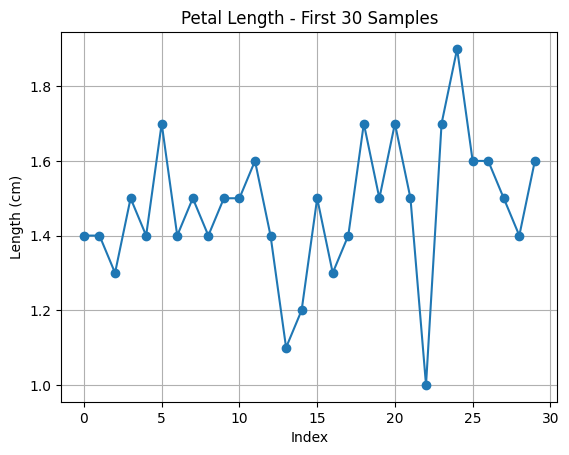

In [7]:

plt.plot(df["petal_length"].head(30), marker='o')
plt.title("Petal Length - First 30 Samples")
plt.ylabel("Length (cm)")
plt.xlabel("Index")
plt.grid(True)
plt.show()


### Box Plot — Petal Length by Species

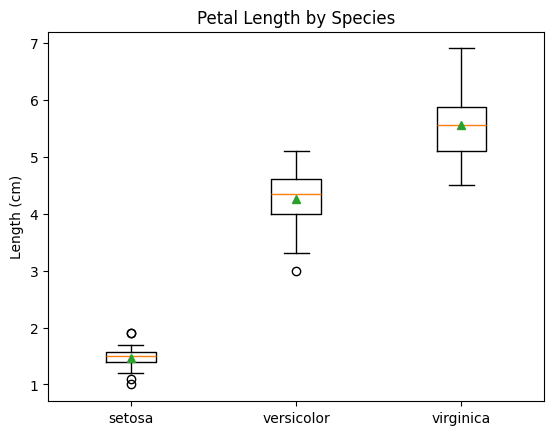

In [8]:

data = [df[df["species"]==s]["petal_length"] for s in df["species"].unique()]
plt.boxplot(data, tick_labels=df["species"].unique(), showmeans=True)
plt.title("Petal Length by Species")
plt.ylabel("Length (cm)")
plt.show()


### Scatter Plot — Petal Length vs Petal Width

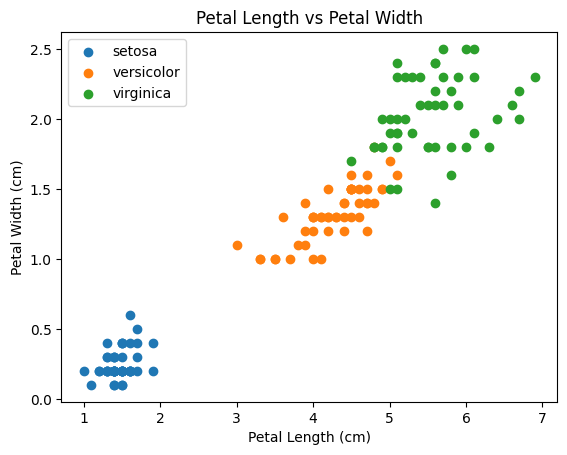

In [9]:

for name in df["species"].unique():
    part = df[df["species"]==name]
    plt.scatter(part["petal_length"], part["petal_width"], label=name)
plt.title("Petal Length vs Petal Width")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend()
plt.show()



## 4) Exercises

Try these on your own:

1. Create an ordinal feature (`short`, `medium`, `long`) from `petal_length` using quantiles.
2. Compare mean vs median of `sepal_width` for each species.
3. Make a scatter plot of `sepal_length` vs `sepal_width`, colored by species.
4. Compute correlations between all four numerical columns.
